In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [24]:
zf = zipfile.ZipFile('data/data.zip')

In [25]:
df = pd.read_json(zf.open('data.json'))

In [26]:
l = df['ticket_types'].str.len()
df1 = pd.DataFrame(np.concatenate(df['ticket_types']).tolist(), index=np.repeat(df.index, l))

df1['total_cost'] = df1['cost'] * df1['quantity_sold']

#df2 = df1.groupby('

df3 = df.drop('ticket_types', axis=1).join(df1).reset_index(drop=True)
df1.reset_index(inplace=True)
df2 = df1[['total_cost', 'index']].groupby('index').sum()
df4 = df.join(df2).reset_index()
df4 = df4.drop('index', axis=1)
df4

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,total_cost
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,0.00
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,875.00
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,4488.48
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None,795.00
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,2399.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,fraudster_event,1361689200,667,0,US,USD,0.0,<p>Celebrates this wonderful holiday with the ...,yahoo.com,1360297993,1361257200,1.360299e+09,1361232000,0,0.00,0,NaN,1,n,President's Day Celebration,27,0,0,5456442,,0.0,,0.0,,,[],11.0,11,1,"[{'event_id': 5456442, 'cost': 45.0, 'availabi...",0,1360297993,1,6100 North Charles Street,US,39.373780,-76.629921,Elkridge Club,MD,0.00
14333,premium,1365566400,5812,5,US,USD,1.0,"<table style=""width: 600px;"" border=""0"" cellsp...",me.com,1360367042,1365134400,1.360370e+09,1365123600,0,9626.30,0,1.0,0,y,ARCS Foundation 2013 Scientist of the Year,42,33,4,5465112,"<p><span style=""font-family: arial,helvetica,s...",0.0,"ARCS Foundation, Inc., San Diego Chapter",0.0,"ARCS Foundation Inc.,

In [5]:
df['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [6]:
df['fraud'] = df['acct_type'].apply(lambda x: True if 'fraud' in x else False)

In [7]:
df['fraud'].value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

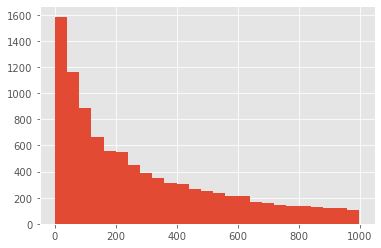

In [8]:
#What is gts?
df['gts'][df['gts']<1000].hist(bins=25)

In [9]:
drop_cols = ['has_header', 
             'venue_address',
             'venue_country',
             'venue_latitude',
             'venue_longitude',
             'venue_name',
             'venue_state',
             'sale_duration']
for col in drop_cols:
    try:
        df.pop(col)
    except:
        continue

look_later = ['acct_type',
              'description',
              'name',
              'org_desc',
              'org_name',
              'payee_name',
              'previous_payouts',
              'ticket_types', # grab cost out of ticket types
              'user_created',
              'email_domain'] # maybe create dummies for anonymous email domains
for col in look_later:
    try:
        df.pop(col)
    except:
        continue


df.dropna(inplace=True)

In [10]:
df['listed'] = df['listed'].apply(lambda x: 1 if 'y' else 0)


In [11]:
dummies = ['country',
           'currency',
           'payout_type']
df_analysis = pd.get_dummies(df, prefix_sep='_')

In [12]:
#  EDA vis ideas:
#  prop fraud by payout type
# 

df

,approx_payout_date,body_length,channels,country,currency,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_logo,listed,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,payout_type,sale_duration2,show_map,user_age,user_type,fraud
0,1266062400,3852,5,US,USD,0.0,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,0,1,60,0,0,527017,0.0,0.0,,33,1,36,1,True
1,1296720000,3499,0,US,USD,1.0,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,1,1,27,23,1,786878,0.0,12.0,CHECK,28,0,149,3,False
2,1296172800,2601,8,US,USD,1.0,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,0,1,28,19,4,787337,0.0,0.0,CHECK,54,0,214,3,False
3,1388966400,12347,6,IE,EUR,1.0,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,1,1,21,39,16,885645,0.0,0.0,ACH,0,0,889,3,False
4,1297900800,2417,11,US,USD,0.0,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0,1,66,30,0,1114349,0.0,0.0,CHECK,63,0,35,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,1361689200,667,0,US,USD,0.0,1360297993,1361257200,1.360299e+09,1361232000,0,0.00,0,1,1,27,0,0,5456442,0.0,0.0,,11,1,0,1,True
14333,1365566400,5812,5,US,USD,1.0,1360367042,1365134400,1.360370e+09,1365123600,0,9626.30,0,0,1,42,33,4,5465112,0.0,0.0,CHECK,55,1,1374,4,False
14334,1368781200,557,13,,USD,0.0,1360600330,1368349200,1.361337e+09,1368327600,1,22.09,0,1,1,67,1,0,5465732,0.0,0.0,ACH,89,1,84,4,False
14335,1361361600,10873,8,US,USD,0.0,1360376285,1360929600,1.360377e+09,1360890000,0,170.00,0,1,1,54,2,101,5465810,0.0,0.0,ACH,6,1,812,3,False


In [13]:
payout_group = df.groupby('payout_type').mean()
payout_group.reset_index(inplace=True)
payout_group = payout_group[['fraud', 'payout_type']]

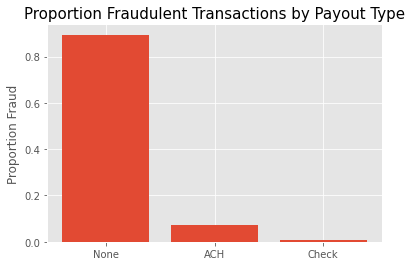

In [14]:
payout_group['payout_type'] = payout_group['payout_type'].apply(lambda x: 'None' if x =='' else x)
payout_group['payout_type'] = payout_group['payout_type'].apply(lambda x: 'Check' if x =='CHECK' else x)

fig, ax = plt.subplots()
ax.bar(payout_group['payout_type'], payout_group['fraud'])
ax.set_title('Proportion Fraudulent Transactions by Payout Type', size = 15)
ax.set_ylabel('Proportion Fraud')
fig.savefig('images/prop_fraud_bypayout.png', bbox_inches = "tight")



In [15]:
df['log_age'] = df['user_age'].apply(lambda x: math.log(x, 2) if x != 0 else 0)

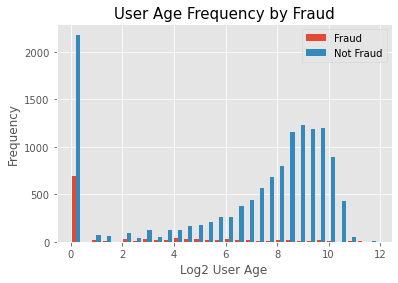

In [16]:
# histogram by user age
age_fraud = df['log_age'][df['fraud'] == True]
age_notfraud = df['log_age'][df['fraud'] == False]
fig, ax = plt.subplots()
ax.hist([age_fraud, age_notfraud], bins=30, label=['Fraud', 'Not Fraud'])

ax.set_title('User Age Frequency by Fraud', size = 15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Log2 User Age')
ax.legend()
fig.savefig('images/User_age_freq.png', bbox_inches = "tight")

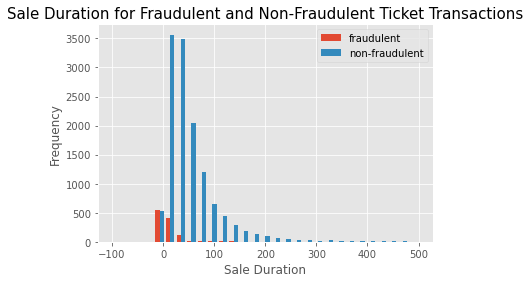

In [22]:
fraud = df['sale_duration2'][df['fraud']==True]
no_fraud = df['sale_duration2'][df['fraud']==False]

bins = np.linspace(-100, 500, 30)
fig, ax = plt.subplots()
ax.hist([fraud, no_fraud], bins, label=['fraudulent', 'non-fraudulent'])
ax.set_title('Sale Duration for Fraudulent and Non-Fraudulent Ticket Transactions', size = 15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Sale Duration')
ax.legend(loc = 'upper right')
fig.savefig('images/sale_duration.png', bbox_inches = "tight")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
y = df_analysis.pop('fraud')
X = df_analysis.copy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=1)

In [18]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)


In [19]:
print(f"F1: {f1_score(y_test, y_predict)}")
print(f"precision: {precision_score(y_test, y_predict)}")
print(f"recall: {recall_score(y_test, y_predict)}")

F1: 0.8591885441527447
precision: 0.9574468085106383
recall: 0.7792207792207793


In [20]:
confusion_matrix(y_test, y_predict)

array([[2582,    8],
       [  51,  180]])

In [26]:
importances = rf.feature_importances_
n=10
indices = np.argsort(importances)[::-1]
features = list(df_analysis.columns[indices])
print("Feature ranking:")
for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

Feature ranking:
1. sale_duration2 (0.197255)
2. payout_type_ (0.085299)
3. gts (0.080426)
4. user_age (0.066338)
5. num_order (0.048991)
6. body_length (0.048699)
7. user_type (0.042707)
8. num_payouts (0.038710)
9. object_id (0.034327)
10. event_published (0.032719)


In [ ]:
from src.helper_functions import gridsearch_with_output

random_forest_grid = {'max_depth': [2, 4, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'oob_score': [True, False],
                      'n_estimators': [20, 30, 40, 50],
                      'class_weight': ['balanced', None],
                      'random_state': [1]
                     }
rf_best_params, rf_best_model, rf_best_score = gridsearch_with_output(RandomForestClassifier(), 
                                                                      random_forest_grid, 
                                                                      score,
                                                                      X_train, y_train)

In [21]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_predict = gb.predict(X_test)

In [22]:
print(f"F1: {f1_score(y_test, y_predict)}")
print(f"precision: {precision_score(y_test, y_predict)}")
print(f"recall: {recall_score(y_test, y_predict)}")

F1: 0.8631090487238979
precision: 0.93
recall: 0.8051948051948052


In [23]:
confusion_matrix(y_test, y_predict)

array([[2576,   14],
       [  45,  186]])

In [27]:
importances = gb.feature_importances_
n=10
indices = np.argsort(importances)[::-1]
features = list(df_analysis.columns[indices])
print("Feature ranking:")
for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

Feature ranking:
1. sale_duration2 (0.346079)
2. payout_type_ (0.258180)
3. user_age (0.153201)
4. gts (0.042097)
5. num_payouts (0.039600)
6. user_type (0.034774)
7. org_twitter (0.024948)
8. org_facebook (0.022073)
9. payout_type_CHECK (0.009536)
10. event_end (0.008555)
